# Movie Recommendation System

# Introduction

# Business Understanding

# Data Understanding

In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import surprise
from surprise.prediction_algorithms import *
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import numpy as np
import datetime as dt


In [2]:
df_links = pd.read_csv("Data/links.csv")
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [4]:
# Checking the movie ID column for duplicates.
df_links['movieId'].duplicated().sum()

0

In [5]:
df_movies = pd.read_csv("Data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
# Checking the movie ID column for duplicates.
df_movies['movieId'].duplicated().sum()

0

In [8]:
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
# Checking the movie ID column for duplicates.
df_ratings['movieId'].duplicated().sum()

91112

In [11]:
df_ratings['userId']

0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64

In [12]:
# counting the amount of users
print(len(df_ratings['userId'].value_counts() > 1))

610


In [13]:
print((df_ratings['rating'].value_counts()))

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [14]:
df_tags = pd.read_csv("Data/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [15]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [16]:
df_tags['movieId'].value_counts()

296     181
2959     54
924      41
293      35
7361     34
       ... 
6107      1
5878      1
5876      1
3192      1
8190      1
Name: movieId, Length: 1572, dtype: int64

In [17]:
# Checking the movie ID column for duplicates.
df_tags['movieId'].duplicated().sum()

2111

In [19]:
# Checking how many moveId's have a value count equal to 1.
df_tagid = df_tags['movieId']
df_tagid = df_tagid.to_frame()
print(len(df_tagid['movieId'].value_counts()==1))

1572


In [20]:
# Counting the number of userId's
print(len(df_tags['userId'].value_counts() > 1))

58


In [21]:
####
"""
All code can join on movieID

"""

'\nAll code can join on movieID\n\n'

## Merging Dataframes

In [22]:
# Merge 'links' and 'movie' dataframes on movieId
dfm1 = df_links.merge(df_movies, on='movieId')
dfm1 = dfm1.dropna()
dfm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
 3   title    9734 non-null   object 
 4   genres   9734 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 456.3+ KB


In [23]:
dfm1['movieId'].duplicated().sum()

0

In [24]:
dfm2 = dfm1.merge(df_ratings, on='movieId')
dfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 100822
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   imdbId     100823 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100823 non-null  object 
 4   genres     100823 non-null  object 
 5   userId     100823 non-null  int64  
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [25]:
dfm2['movieId'].duplicated().sum()

91107

In [26]:
print(len(dfm2['movieId']) - dfm2['movieId'].duplicated().sum())

9716


In [27]:
#dfm3 = dfm2.merge(df_tags, on='movieId')
#dfm3.info()

# Data Preparation

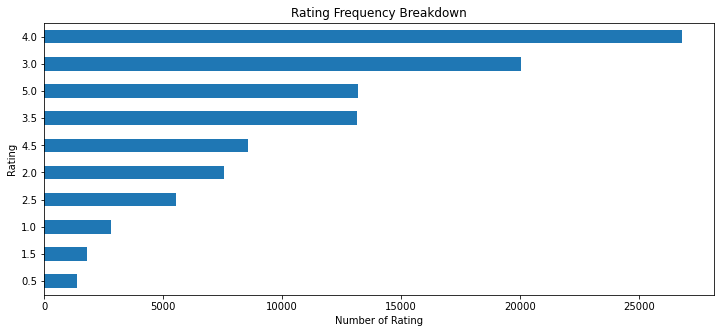

In [28]:
ax = dfm2['rating'].value_counts().plot.barh(figsize=(12,5))
ax.invert_yaxis()
ax.set_ylabel('Rating')
ax.set_xlabel('Number of Rating')
ax.set_title('Rating Frequency Breakdown')
plt.savefig('ratingfreq.png', bbox_inches='tight', dpi=300)

In [29]:
filtered_df = dfm2[dfm2['rating'] >= 3.0]

sorted_df = filtered_df.sort_values('rating', ascending=False)
sorted_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81754 entries, 72059 to 49503
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    81754 non-null  int64  
 1   imdbId     81754 non-null  int64  
 2   tmdbId     81754 non-null  float64
 3   title      81754 non-null  object 
 4   genres     81754 non-null  object 
 5   userId     81754 non-null  int64  
 6   rating     81754 non-null  float64
 7   timestamp  81754 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 5.6+ MB


In [30]:
sorted_df['movieId'].duplicated().sum()

73309

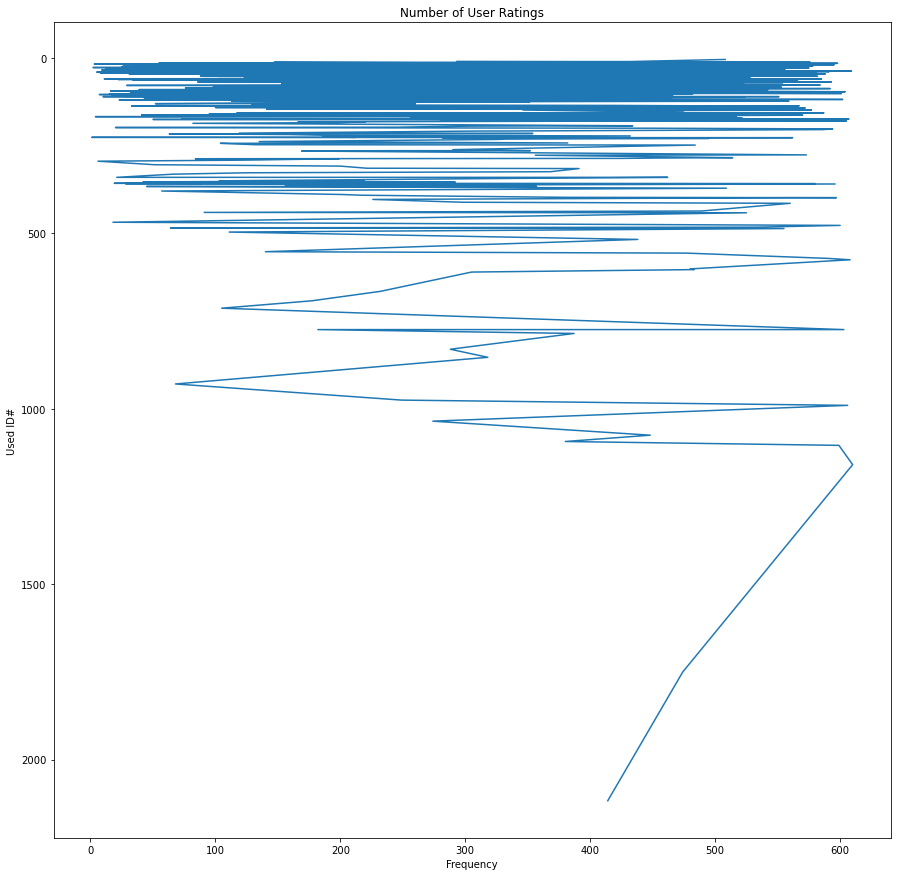

In [33]:
ax = sorted_df['userId'].value_counts().plot(figsize=(15,15))
ax.invert_yaxis()
ax.set_ylabel('Used ID#')
ax.set_xlabel('Frequency')
ax.set_title('Number of User Ratings')
plt.savefig('userrtg.png', bbox_inches='tight', dpi=300)

# Modleing

### Collaborative Filtering

In [34]:
print("The userId contains", len(dfm2['userId'].value_counts()), "different users that contributed a movie rating.")

The userId contains 610 different users that contributed a movie rating.


In [35]:
reader = surprise.Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dfm2[['movieId', 'userId', 'rating']], reader)

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [36]:
from surprise import KNNBasic

model = KNNBasic().fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [37]:
surprise.accuracy.mae(model.test(test))
surprise.accuracy.rmse(model.test(test))

MAE:  0.6986
RMSE: 0.9075


0.9074946456079186

# Conclusion